In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [3]:
listname = pd.read_csv("_ind_nifty100list.csv")
listname.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025
1,Adani Enterprises Ltd.,Metals & Mining,ADANIENT,EQ,INE423A01024
2,Adani Green Energy Ltd.,Power,ADANIGREEN,EQ,INE364U01010
3,Adani Ports and Special Economic Zone Ltd.,Services,ADANIPORTS,EQ,INE742F01042
4,Adani Transmission Ltd.,Power,ADANITRANS,EQ,INE931S01010


In [23]:
stock_price = pd.DataFrame()

for i in range(len(listname['Symbol'])):
    try:
        list_stock = (pd.read_csv("{}.csv".format(listname['Symbol'][i])))
        stock_price.insert(i, listname['Symbol'][i], list_stock.Close)
    except:
        continue

list_stock = (pd.read_csv("{}.csv".format(listname['Symbol'][0])))
#stock_price.insert(0, 'Date', list_stock.Date)
stock_price.set_index(list_stock.Date, inplace = True)
stock_price.head()

,ACC,ADANIENT,ADANIGREEN,ADANIPORTS,ADANITRANS,AMBUJACEM,APOLLOHOSP,ASIANPAINT,DMART,AXISBANK,...,TECHM,TITAN,TORNTPHARM,UPL,ULTRACEMCO,MCDOWELL-N,VEDL,WIPRO,ZOMATO,ZYDUSLIFE
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-09,2310.300049,1783.150024,1919.800049,733.450012,1955.199951,382.799988,4577.250000,3228.350098,4002.100098,803.849976,...,1454.800049,2484.800049,1300.574951,770.500000,7504.049805,854.599976,376.649994,568.950012,94.199997,405.500000
2022-02-10,2303.550049,1786.099976,1907.949951,731.049988,2036.400024,374.850006,4590.649902,3238.750000,4162.700195,809.799988,...,1468.500000,2491.850098,1298.574951,770.099976,7474.500000,861.349976,379.500000,573.650024,94.449997,401.299988
2022-02-11,2249.350098,1764.300049,1907.599976,723.700012,2016.050049,367.899994,4514.899902,3216.300049,4142.250000,803.799988,...,1424.900024,2442.250000,1295.300049,753.200012,7323.600098,844.299988,378.049988,561.450012,88.699997,392.350006
2022-02-14,2153.899902,1663.949951,1862.150024,695.750000,1915.250000,355.100006,4486.350098,3143.449951,3979.750000,773.349976,...,1390.150024,2398.000000,1275.599976,721.700012,7089.100098,813.599976,361.500000,541.700012,82.449997,382.649994
2022-02-15,2234.300049,1744.250000,1889.500000,720.599976,1926.949951,363.549988,4663.399902,3264.600098,4081.750000,796.950012,...,1439.650024,2495.899902,1296.449951,744.700012,7290.299805,851.650024,371.950012,563.349976,82.699997,387.200012


In [47]:
df = stock_price
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("_weights.csv")  # saves to file
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('ACC', 0.0), ('ADANIENT', 0.0), ('ADANIGREEN', 0.0), ('ADANIPORTS', 0.0), ('ADANITRANS', 0.23045), ('AMBUJACEM', 0.0), ('APOLLOHOSP', 0.0), ('ASIANPAINT', 0.0), ('DMART', 0.0), ('AXISBANK', 0.0), ('BAJAJ-AUTO', 0.0), ('BAJFINANCE', 0.0), ('BAJAJFINSV', 0.0), ('BAJAJHLDNG', 0.0), ('BANDHANBNK', 0.0), ('BANKBARODA', 0.0), ('BERGEPAINT', 0.0), ('BPCL', 0.0), ('BHARTIARTL', 0.0), ('BIOCON', 0.0), ('BOSCHLTD', 0.0), ('BRITANNIA', 0.0), ('CHOLAFIN', 0.0), ('CIPLA', 0.0), ('COALINDIA', 0.0), ('COLPAL', 0.0), ('DLF', 0.0), ('DABUR', 0.0), ('DIVISLAB', 0.0), ('DRREDDY', 0.0), ('EICHERMOT', 0.0), ('NYKAA', 0.0), ('GAIL', 0.0), ('GLAND', 0.0), ('GODREJCP', 0.0), ('GRASIM', 0.0), ('HCLTECH', 0.0), ('HDFCAMC', 0.0), ('HDFCBANK', 0.0), ('HDFCLIFE', 0.0), ('HAVELLS', 0.0), ('HEROMOTOCO', 0.0), ('HINDALCO', 0.0), ('HINDUNILVR', 0.0), ('HDFC', 0.0), ('ICICIBANK', 0.0), ('ICICIGI', 0.0), ('ICICIPRULI', 0.0), ('ITC', 0.38135), ('IOC', 0.0), ('INDUSTOWER', 0.0), ('INDUSINDBK', 0.0), ('NAUKRI

(1.3680083937511158, 0.24628695510725437, 5.473324371419014)

In [75]:
nifty50 = pd.read_csv("_NIFTY50.csv")
nifty50['r1'] = np.log(nifty50.Close.shift(1)/nifty50.Close)
nifty50.head()

,Date,Open,High,Low,Close,Adj Close,Volume,r1
0,2022-02-09,17370.099609,17477.150391,17339.000000,17463.800781,17463.800781,236400,NaN
1,2022-02-10,17554.099609,17639.449219,17427.150391,17605.849609,17605.849609,273600,-0.008101
2,2022-02-11,17451.000000,17454.750000,17303.000000,17374.750000,17374.750000,253100,0.013213
3,2022-02-14,17076.150391,17099.500000,16809.650391,16842.800781,16842.800781,305500,0.031095
4,2022-02-15,16933.250000,17375.000000,16839.250000,17352.449219,17352.449219,298700,-0.029810


In [69]:
portfolio_weight = {}
for w in cleaned_weights:
    if cleaned_weights[w] != 0:
        portfolio_weight[w] = cleaned_weights[w]

portfolio_weight

{'ADANITRANS': 0.23045, 'ITC': 0.38135, 'M&M': 0.3882}

In [77]:
portfolio = stock_price[portfolio_weight.keys()]
portfolio['overall'] = sum([portfolio_weight[i] * portfolio[i] for i in portfolio_weight])
portfolio['r1'] = np.log(portfolio.overall.shift(1)/portfolio.overall)
portfolio.head()

C:\Users\joshi\AppData\Local\Temp\ipykernel_10776\3546512042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio['overall'] = sum([portfolio_weight[i] * portfolio[i] for i in portfolio_weight])
C:\Users\joshi\AppData\Local\Temp\ipykernel_10776\3546512042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio['r1'] = np.log(portfolio.overall.shift(1)/portfolio.overall)


,ADANITRANS,ITC,M&M,overall,r1
Date,,,,,
2022-02-09,1955.199951,230.149994,840.200012,864.509174,NaN
2022-02-10,2036.400024,232.250000,853.049988,889.010928,-0.027948
2022-02-11,2016.050049,232.449997,853.650024,884.630479,0.004940
2022-02-14,1915.250000,219.449997,825.049988,845.341024,0.045430
2022-02-15,1926.949951,223.000000,854.599976,860.862377,-0.018195


C:\Users\joshi\AppData\Local\Temp\ipykernel_10776\3457787245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio['Cum_Ret'] = portfolio['r1'].cumsum()


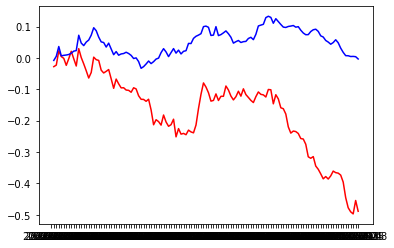

In [79]:
portfolio['Cum_Ret'] = portfolio['r1'].cumsum()
nifty50['Cum_Ret'] = nifty50['r1'].cumsum()

plt.plot(portfolio['Cum_Ret'],color='red')
plt.plot(nifty50['Cum_Ret'],color='blue')

In [21]:
var = {}
vol = {}

for i in range(len(list_stock)):
    list_stock[i]['r1'] = np.log(list_stock[i].Close / list_stock[i].Close.shift(1))
    var[listname['Symbol'][i]] = list_stock[i]['r1'].var()
    vol[listname['Symbol'][i]] = np.sqrt(var[listname['Symbol'][i]] * 90)

list_stock[1].head()
vol['INFY']

0.18260623827107722